In [3]:
import pandas as pd
import matplotlib.pyplot as  plt
import numpy as np
import seaborn as sns


In [2]:
# import Dataset
data = pd.read_excel(r"C:\Users\USER\Documents\Data Challenges\SEPTEMBER ONYX\Credit_Risk_Dataset_Onyx_Data_September_25.xlsx")
data.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,...,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,...,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,...,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,...,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [4]:
# check basic dataset information(datatype, non-null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_ID                   32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
 13  gender                      325

In [ ]:
# check for duplicates
data.duplicated().sum()

np.int64(0)

In [12]:
# check for missing values
data.isnull().sum()

client_ID                       0
person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
gender                          0
marital_status                  0
education_level                 0
country                         0
state                           0
city                            0
city_latitude                   0
city_longitude                  0
employment_type                 0
loan_term_months                0
loan_to_income_ratio            0
other_debt                      0
debt_to_income_ratio            0
open_accounts                   0
credit_utilization_ratio        0
past_delinquencies              0
dtype: int64

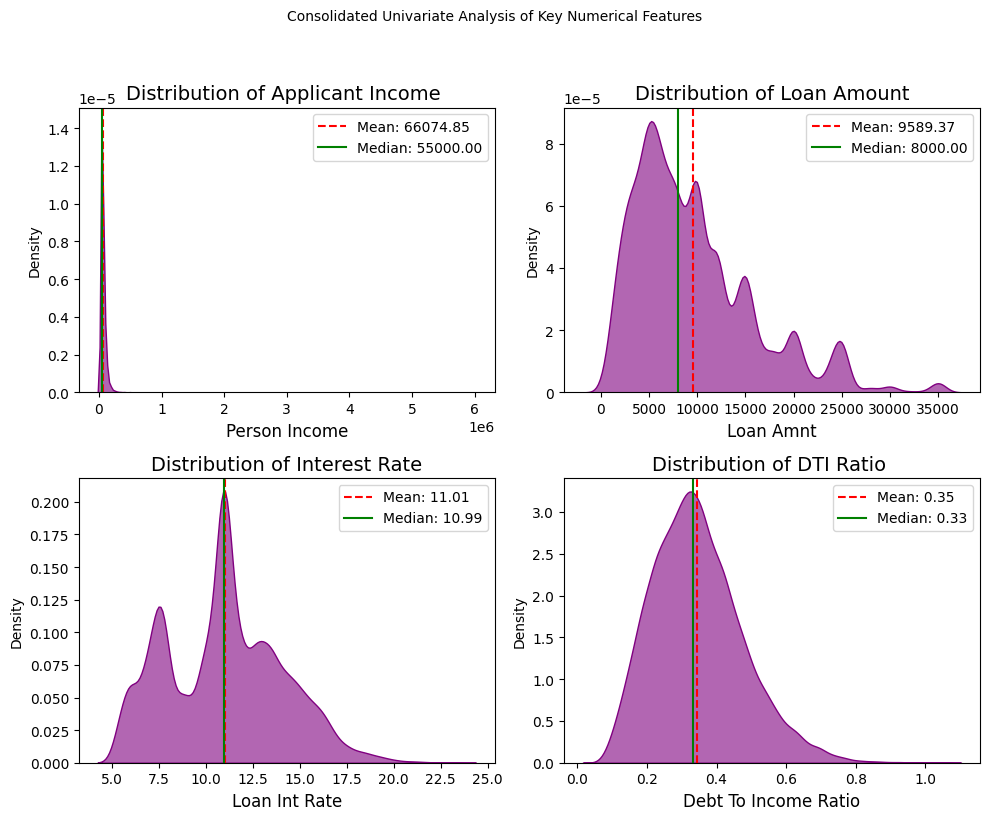

In [13]:
# List of the four most critical numerical features for univariate analysis
numerical_features = [
    'person_income', 
    'loan_amnt', 
    'loan_int_rate', 
    'debt_to_income_ratio'
]

# Create a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten() # Flatten the 2x2 array for easy iteration

# Titles corresponding to the insights
titles = [
    'Distribution of Applicant Income ',
    'Distribution of Loan Amount',
    'Distribution of Interest Rate',
    'Distribution of DTI Ratio '
]


for i, feature in enumerate(numerical_features):
    # Use KDE plot to clearly show the shape and modality
    sns.kdeplot(data[feature], ax=axes[i], fill=True, color='purple', alpha=0.6)
    
    # Add mean and median to highlight skewness
    mean_val = data[feature].mean()
    median_val = data[feature].median()
    
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.2f}')
    
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    axes[i].legend()

plt.suptitle('Consolidated Univariate Analysis of Key Numerical Features', fontsize=10, y=1.02)
plt.tight_layout()

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5032\855273480.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_features[0], data=data, ax=axes[0], palette='crest')
C:\Users\USER\AppData\Local\Temp\ipykernel_5032\855273480.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_features[1], data=data, ax=axes[1], order=order_home, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_5032\855273480.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_features[2], data=data, ax=axes[2], orde

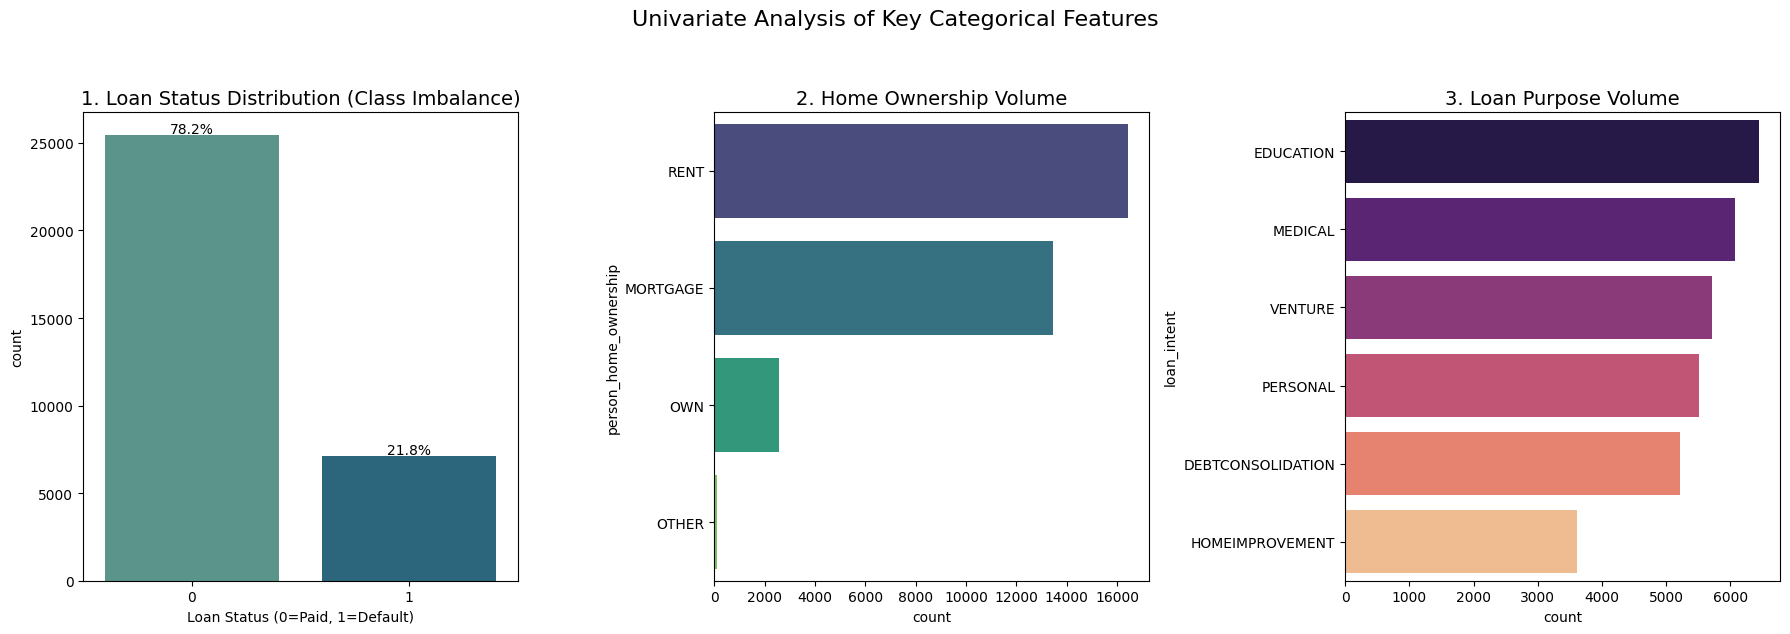

In [17]:
# List of the key categorical features for frequency analysis
categorical_features = [
    'loan_status',            # Target Variable (Imbalance Check)
    'person_home_ownership',  # Home Stability (Concentration Check)
    'loan_intent'             # Product Type (Volume Check)
]

# Set up the figure for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# 1. Loan Status Distribution (Imbalance Check) 
sns.countplot(x=categorical_features[0], data=data, ax=axes[0], palette='crest')
axes[0].set_title('1. Loan Status Distribution (Class Imbalance)', fontsize=14)
axes[0].set_xlabel('Loan Status (0=Paid, 1=Default)')

# Add percentage labels (essential for showing imbalance)
total = len(data[categorical_features[0]])
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2., 
        height + 100, 
        f'{height/total:.1%}', 
        ha="center"
    )

#2. Home Ownership Distribution (Concentration) 

order_home = data[categorical_features[1]].value_counts().index
sns.countplot(y=categorical_features[1], data=data, ax=axes[1], order=order_home, palette='viridis')
axes[1].set_title('2. Home Ownership Volume', fontsize=14)

# 3. Loan Intent Distribution (Product Volume) 

order_intent = data[categorical_features[2]].value_counts().index
sns.countplot(y=categorical_features[2], data=data, ax=axes[2], order=order_intent, palette='magma')
axes[2].set_title('3. Loan Purpose Volume', fontsize=14)

plt.suptitle('Univariate Analysis of Key Categorical Features', fontsize=16, y=1.05)
plt.tight_layout()

plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_5032\4168186555.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_percent_income', data=data, palette=['purple', 'red'])


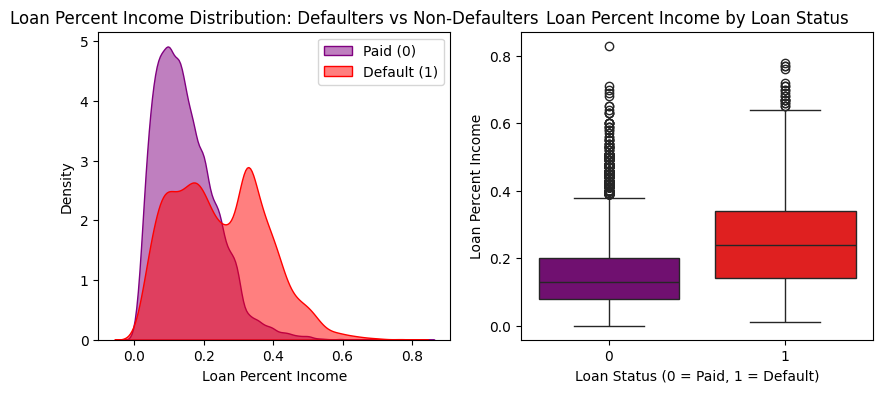

In [26]:
# How does the size of a loan compared to a person’s income affect their chances of defaulting?
plt.figure(figsize=(10, 4))

# Panel 1: KDE Plot (Distribution Comparison) 
plt.subplot(1, 2, 1)
sns.kdeplot(data[data['loan_status'] == 0]['loan_percent_income'], 
            label='Paid (0)', fill=True, color='purple', alpha=0.5)
sns.kdeplot(data[data['loan_status'] == 1]['loan_percent_income'], 
            label='Default (1)', fill=True, color='red', alpha=0.5)
plt.title('Loan Percent Income Distribution: Defaulters vs Non-Defaulters')
plt.xlabel('Loan Percent Income')
plt.legend()


# --- Panel 2: Box Plot (Summary Statistics Comparison) ---
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='loan_percent_income', data=data, palette=['purple', 'red'])
plt.title('Loan Percent Income by Loan Status')
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('Loan Percent Income')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5032\3509651790.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


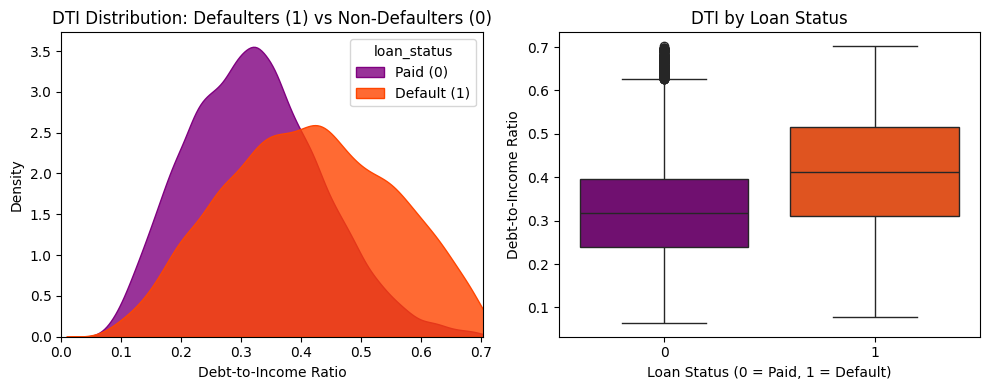

In [24]:
# Does having too much existing debt make someone more likely to default on


dti_max = data['debt_to_income_ratio'].quantile(0.99)
df_capped = data[data['debt_to_income_ratio'] <= dti_max].copy()

plt.figure(figsize=(10, 4))

# --- Panel 1: KDE Plot (Distribution Comparison) ---
plt.subplot(1, 2, 1)
sns.kdeplot(
    df_capped[df_capped['loan_status'] == 0]['debt_to_income_ratio'], 
    label='Paid (0)', 
    fill=True, 
    color='purple', 
    alpha=0.8
)
sns.kdeplot(
    df_capped[df_capped['loan_status'] == 1]['debt_to_income_ratio'], 
    label='Default (1)', 
    fill=True, 
    color='orangered', 
    alpha=0.8
)
plt.title('DTI Distribution: Defaulters (1) vs Non-Defaulters (0)')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Density')
plt.xlim(0, dti_max) 
plt.legend(title='loan_status')

# --- Panel 2: Box Plot (Median and Quartile Comparison) ---
plt.subplot(1, 2, 2)
sns.boxplot(
    x='loan_status', 
    y='debt_to_income_ratio', 
    data=df_capped, 
    palette=['purple', 'orangered']
)
plt.title('DTI by Loan Status')
plt.xlabel('Loan Status (0 = Paid, 1 = Default)')
plt.ylabel('Debt-to-Income Ratio')

plt.tight_layout()
plt.show()

Loan Amount Tier feature created successfully.


C:\Users\USER\AppData\Local\Temp\ipykernel_5032\2075222877.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_loan_amt = data.groupby('Loan_Amt_Tier')['loan_status'].mean().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_5032\2075222877.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


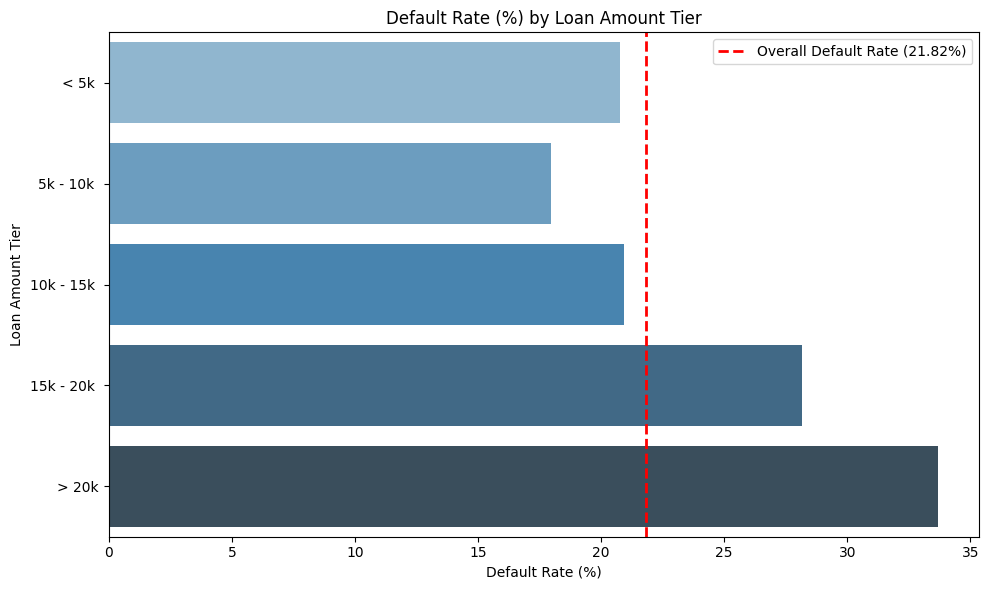

In [23]:
#  How does the size of the loan affect the chance that a customer will default?
# Calculate Risk by Loan Amount Tier 

bins = [0, 5000, 10000, 15000, 20000, data['loan_amnt'].max() + 1] 


labels = ['< 5k ', 
          '5k - 10k ', 
          '10k - 15k ', 
          '15k - 20k ', 
          '> 20k']

# Create the new categorical feature
data['Loan_Amt_Tier'] = pd.cut(data['loan_amnt'], bins=bins, labels=labels, right=False)

# Calculate the overall default rate for the benchmark
overall_default_rate = data['loan_status'].mean()

print("Loan Amount Tier feature created successfully.")
risk_by_loan_amt = data.groupby('Loan_Amt_Tier')['loan_status'].mean().reset_index()
risk_by_loan_amt['Default_Rate'] = risk_by_loan_amt['loan_status'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Default_Rate', 
    y='Loan_Amt_Tier', 
    data=risk_by_loan_amt.sort_values(by='Default_Rate', ascending=False), 
    palette='Blues_d'
)

# Add the portfolio benchmark line
plt.axvline(
    overall_default_rate * 100, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Overall Default Rate ({overall_default_rate * 100:.2f}%)'
)

plt.title('Default Rate (%) by Loan Amount Tier')
plt.xlabel('Default Rate (%)')
plt.ylabel('Loan Amount Tier')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5032\3928797719.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_rate = data.groupby('Rate_Tier')['loan_status'].mean().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_5032\3928797719.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


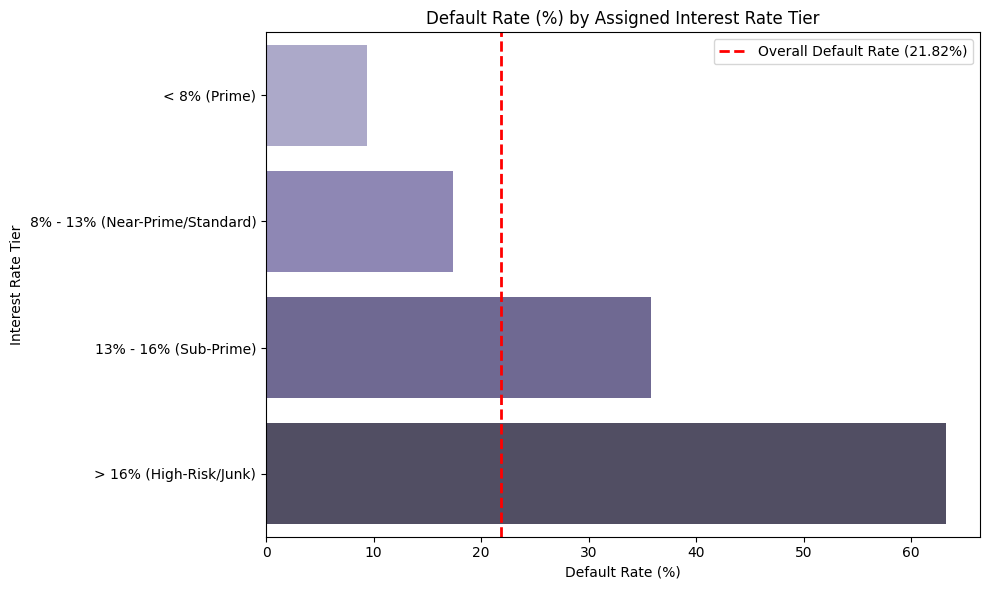

In [27]:
#  Bivariate Analysis: Default Rate by Rate Tier 
#  Does charging higher interest rates lead to more customers failing to pay back their loans


# Define the bins for grouping the loan interest rates
bins = [0, 8.0, 13.0, 16.0, data['loan_int_rate'].max() + 1] 

# Define the labels for the new rate categories
labels = ['< 8% (Prime)', 
          '8% - 13% (Near-Prime/Standard)', 
          '13% - 16% (Sub-Prime)', 
          '> 16% (High-Risk/Junk)']

# Create the new categorical feature 'Rate_Tier'
data['Rate_Tier'] = pd.cut(data['loan_int_rate'], bins=bins, labels=labels, right=False)

# Calculate the overall default rate for the benchmark (assuming 'loan_status' is a binary column)
overall_default_rate = data['loan_status'].mean()

# Group by the new tier and calculate the mean of 'loan_status' (which is the default rate for that tier)
risk_by_rate = data.groupby('Rate_Tier')['loan_status'].mean().reset_index()
risk_by_rate['Default_Rate'] = risk_by_rate['loan_status'] * 100

# Plotting the results 
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Default_Rate', 
    y='Rate_Tier', 
    data=risk_by_rate.sort_values(by='Default_Rate', ascending=False), 
    palette='Purples_d'
)

# Add the portfolio benchmark line
plt.axvline(
    overall_default_rate * 100, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Overall Default Rate ({overall_default_rate * 100:.2f}%)'
)

plt.title('Default Rate (%) by Assigned Interest Rate Tier')
plt.xlabel('Default Rate (%)')
plt.ylabel('Interest Rate Tier')
plt.legend()
plt.tight_layout()
plt.show()

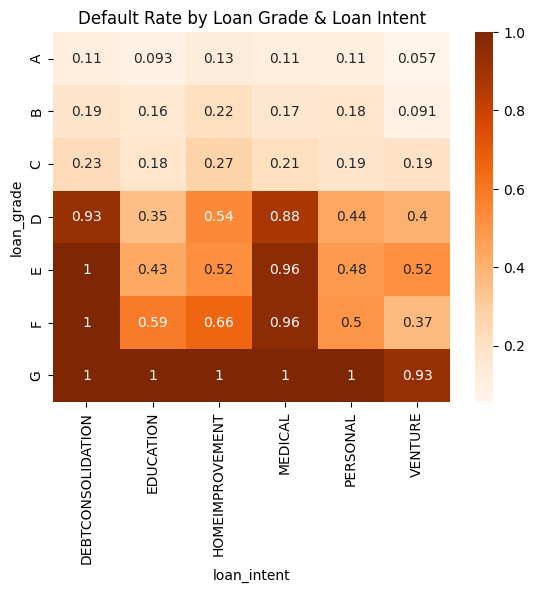

In [28]:
#Which groups of customers and loan reasons are causing the biggest losses?
pivot = data.pivot_table(
    values="loan_status",
    index="loan_grade",
    columns="loan_intent",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="Oranges")
plt.title("Default Rate by Loan Grade & Loan Intent")
plt.show()

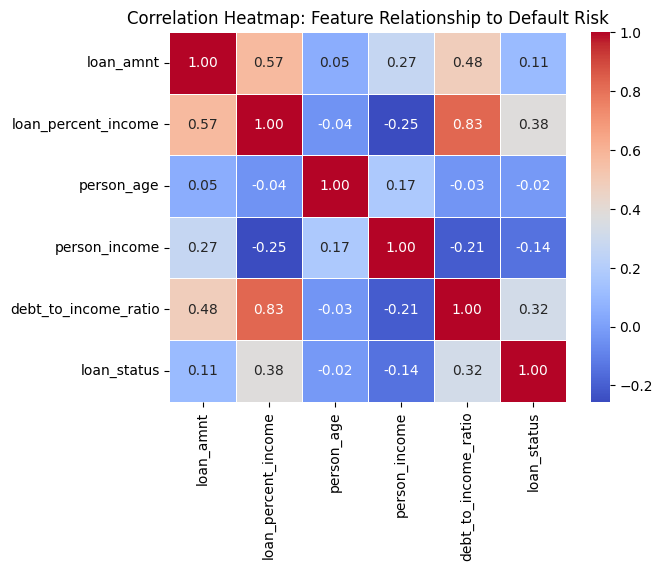

In [36]:
#  Which numbers tell us most clearly if a borrower is likely to default?
cols = ['loan_amnt', 'loan_percent_income', 'person_age', 'person_income', 'debt_to_income_ratio'] 
corr = data[cols + ["loan_status"]].corr()
sns.heatmap(
    corr, 
    annot=True,
    cmap="coolwarm",
    fmt=".2f", 
    linewidths=.5 
)
plt.title("Correlation Heatmap: Feature Relationship to Default Risk")
plt.show()

In [37]:
# Which credit grades contribute most to loan defaults and financial losses?
# Total loan exposure in default
exposure_default = data.loc[data.loan_status == 1, "loan_amnt"].sum()

# Segment risk contribution
segment_risk = data.groupby("loan_grade").apply(
    lambda g: pd.Series({
        "default_rate": g.loan_status.mean(),
        "volume": len(g),
        "risk_exposure": g[g.loan_status == 1].loan_amnt.sum()
    })
)
print(segment_risk)

            default_rate   volume  risk_exposure
loan_grade                                      
A               0.099564  10777.0     10202525.0
B               0.162760  10451.0     19120425.0
C               0.207340   6458.0     13579600.0
D               0.590458   3626.0     22800100.0
E               0.644191    964.0      7826925.0
F               0.705394    241.0      2496875.0
G               0.984375     64.0      1098925.0


C:\Users\USER\AppData\Local\Temp\ipykernel_5032\3153112723.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_risk = data.groupby("loan_grade").apply(
